In [4]:
!pip install BaselineRemoval

In [27]:
from BaselineRemoval import BaselineRemoval as br
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [115]:
def gaussian(x,a,cen,s):
  return a*np.exp(-(x-cen)**2/(2*s**2))

def ngaussians(n,x,params):
  gauss = 0
  for i in range(n):
    gauss += gaussian(x,*params[3*i:3*i+3])
  return gauss
def errfunc(params,n,x,y):
  return (ngaussians(n,x,params)-y)**2

In [183]:
def remove_base(data):
  baseObj = br(data)
  base_rem = baseObj.IModPoly(deg)
  return (base_rem)

def get_values(data,height=0.6,prominence=0.3):
  peaks,values = signal.find_peaks(data, height=height,prominence=prominence,width = 0)
  fwhm = values["widths"]
  sigma = [i/(2*np.sqrt(2*np.log(2))) for i in fwhm]
  heights = values["peak_heights"]
  x=np.linspace(1,len(data),len(data))
  n = len(peaks)
  init = []
  for i in range(n):
    init.extend([heights[i],peaks[i],sigma[i]])
  return  init,n,x

In [180]:
def plot(x,n,data,params):
  sum = 0
  plt.rcParams["figure.figsize"] = (15,10)
  plt.plot(x,data,label="Original Signal")
  for i in range(n):
    label = "Gaussian for Peak " + str(i+1)
    g = gaussian(x,*params[3*i:3*i+3])
    plt.plot(x,g,'--',label=label)
    sum += g   
  plt.plot(x,sum,label='Total fit')
  plt.legend()

In [188]:
def process(file):
  deg = 2
  f = open(file,"r")
  data = []
  for i in f:
    data.append(float(i))
  data = np.array(data)

  base_rem = remove_base(data)

  init,n,x = get_values(base_rem)
  coef, cov = leastsq(errfunc,init,args=(n,x,base_rem))

  plot(x,n,base_rem,coef)
  plt.savefig(file+'_fit.jpeg')

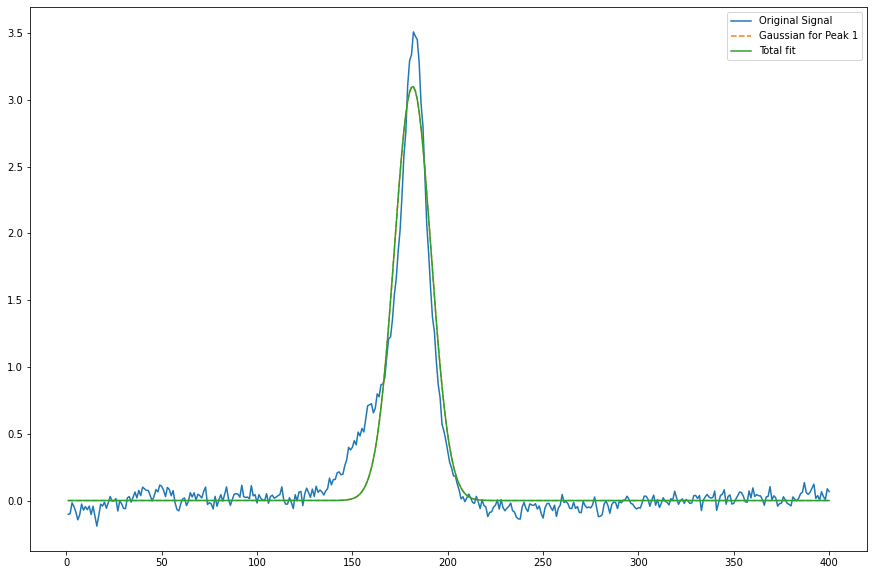

In [189]:
process('gl-153')

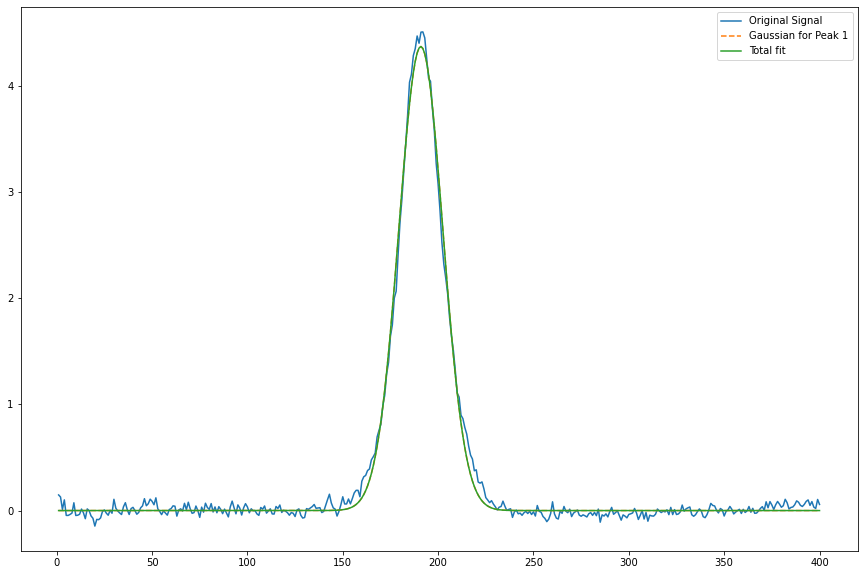

In [190]:
process('gl-170')

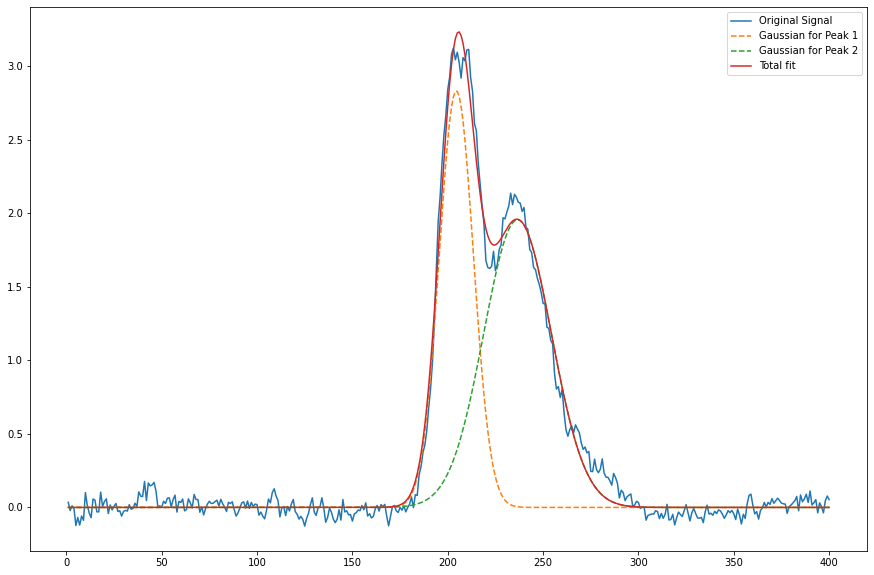

In [191]:
process('gl140.1')

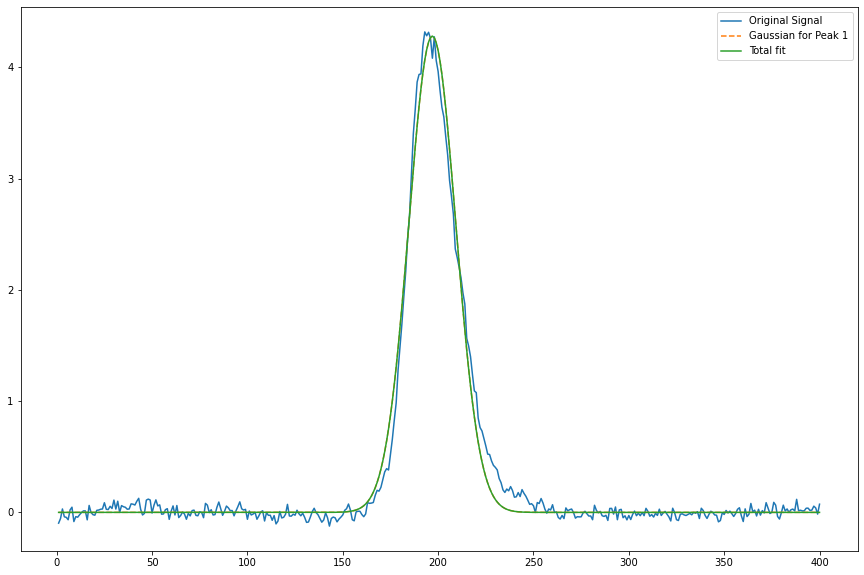

In [193]:
process('gl180')